## SVM en Python

#### Paso 1. READ DATA

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv")
total_data.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


#### Paso 2: Procesamiento de datos

##### Categorical to numeric transformation

In [2]:
total_data["is_spam"] = total_data["is_spam"].apply(lambda x: 1 if x else 0).astype(int)

total_data.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 35.3+ KB



##### Elimination of repeated values

In [4]:
print(total_data.shape)
print(f"Spam: {len(total_data.loc[total_data.is_spam == 1])}")
print(f"No spam: {len(total_data.loc[total_data.is_spam == 0])}")

(2999, 2)
Spam: 696
No spam: 2303


##### AND DUPLICATE

In [5]:
total_data = total_data.drop_duplicates()
total_data = total_data.reset_index(inplace = False, drop = True)
total_data.shape

(2369, 2)

In [6]:
print(f"Spam: {len(total_data.loc[total_data.is_spam == 1])}")
print(f"No spam: {len(total_data.loc[total_data.is_spam == 0])}")

Spam: 244
No spam: 2125


##### TABLE:

* (2999, 2)
* Spam: 696
* No spam: 2303

##### ELIMINATION  DUPLICATES:
* (2369, 2)
* Spam: 244
* No spam: 2125


##### TEXT PROCESSING


In [7]:
import regex as re

def preprocess_text(text):
    # Eliminar cualquier caracter que no sea una letra (a-z) o un espacio en blanco ( )
    text = re.sub(r'[^a-z ]', " ", text)

    # Eliminar espacios en blanco
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Reducir espacios en blanco múltiples a uno único
    text = re.sub(r'\s+', " ", text.lower())

    # Eliminar tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

total_data["url"] = total_data["url"].apply(preprocess_text)
total_data.head()

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",1
1,"[https, www, hvper, com]",1
2,"[https, briefingday, com, v, i]",1
3,"[https, briefingday, com, m, commentform]",0
4,"[https, briefingday, com, fan]",1


##### LEMMNATIZATION OF THE TEXT


In [8]:
from nltk import download
import nltk                     #-> Se añade por necesidad ya que no tenia el recurso
nltk.download("omw-1.4")        #-> Se añade por necesidad ya que no tenia el recurso
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
download("wordnet")
lemmatizer = WordNetLemmatizer()

download("stopwords")
stop_words = stopwords.words("english")

def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

total_data["url"] = total_data["url"].apply(lemmatize_text)
total_data.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Password\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Password\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Password\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,is_spam
0,"[http, briefingday, list, manage, unsubscribe]",1
1,"[http, hvper]",1
2,"[http, briefingday]",1
3,"[http, briefingday, commentform]",0
4,"[http, briefingday]",1


##### WORD CLOUD

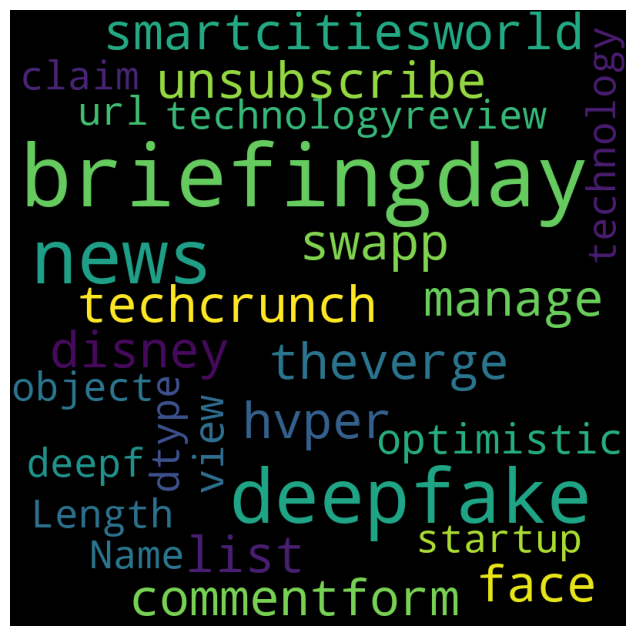

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 40, random_state = 82)\
    .generate(str(total_data["url"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### PALABRA MAS USADA

* Palabra mas usada: Briefingday
* No quiere decir que sea la mas importante.
* max_words = 1000 (Se ha probado con otras cantidades y da practicamente el mismo resultado)


##### CONVERSION TO NUMBERS

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tokens_list = total_data["url"]
tokens_list = [" ".join(tokens) for tokens in tokens_list]

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = total_data["is_spam"]

X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### DIVISION INTO TRAINING AND TEST SETS

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 3: MODEL INITIALIZATION ADN TRAINING

In [12]:
from sklearn.svm import SVC

model = SVC(kernel = "rbf", C = 10, gamma = 0.1, decision_function_shape = 'ovr',probability = False, shrinking = False, random_state = 42)
model.fit(X_train, y_train)



SVC(C=10, gamma=0.1, random_state=42, shrinking=False)

#### 4: MODEL PREDICT


In [13]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

##### ACCURACY

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9620253164556962

#### 5: SAVE MODEL


In [15]:
from pickle import dump

dump(model, open(r"G:\Mi unidad\1 Archivos py\4 GEEK\2 PROYECTOS\26 NLP\ruta.sav", "wb"))

## HIPERPARAMETRIZACION

* 
It has not been hyperparameterized because it temporarily requires many resources.

In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameters
hyperparams = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.1, 1, 10],
    'class_weight': [None, 'balanced'],
    'degree': [2, 3, 4],
    'decision_function_shape': ['ovr', 'ovo'],
    'probability': [True, False],
    'shrinking': [True, False],
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

'from sklearn.model_selection import GridSearchCV\n\n# Define parameters\nhyperparams = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\', \'poly\', \'rbf\', \'sigmoid\'],\n    \'gamma\': [\'scale\', \'auto\', 0.001, 0.1, 1, 10],\n    \'class_weight\': [None, \'balanced\'],\n    \'degree\': [2, 3, 4],\n    \'decision_function_shape\': [\'ovr\', \'ovo\'],\n    \'probability\': [True, False],\n    \'shrinking\': [True, False],\n}\n\n# We initialize the grid\ngrid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)\ngrid'

In [17]:
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

'grid.fit(X_train, y_train)\n\nprint(f"Best hyperparameters: {grid.best_params_}")'